[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796013  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088303  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320969  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484360  75.797501  76.110001  74.290001  74.290001  132079200
Mean Squared Error: 9.316563270731105


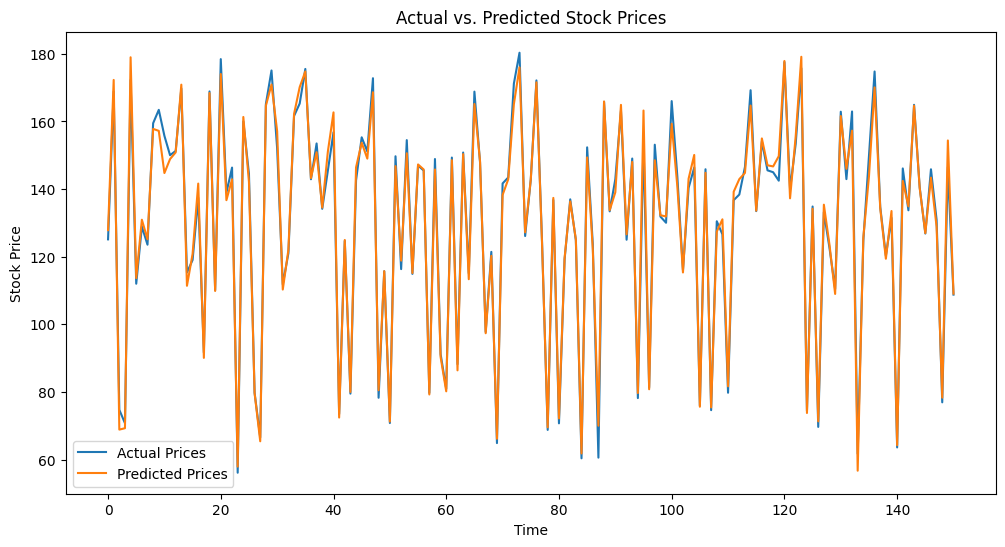

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(stock_data.head())
stock_data = stock_data[['Close']]
stock_data['Future_Close'] = stock_data['Close'].shift(-1)
stock_data = stock_data[:-1]
X = stock_data[['Close']]
y = stock_data['Future_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.show()
